In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



url = "data.csv"
# feature names
features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
dataset = pandas.read_csv(url, names=features)


array = dataset.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(array)

X = scaled[:,0:22]

Y = scaled[:,22]
validation_size = 0.25

seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


num_folds = 10
num_instances = len(X_train)

scoring = 'accuracy'

results = []
clf = LogisticRegression()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(clf, X_train, Y_train, cv=kfold, scoring=scoring)
clf.fit(X_train, Y_train)




predictions = clf.predict(X_validation)
print("Logistic regression")
print(accuracy_score(Y_validation, predictions)*100)
acc1 = accuracy_score(Y_validation, predictions) * 100
print(matthews_corrcoef(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


Logistic regression
83.6734693877551
0.4287427131192695
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.86      0.95      0.90        39

    accuracy                           0.84        49
   macro avg       0.76      0.67      0.70        49
weighted avg       0.82      0.84      0.82        49



In [ ]:
url = "data.csv"

features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
dataset = pandas.read_csv(url, names=features)

array = dataset.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(array)

X = scaled[:,0:22]

Y = scaled[:,22]
validation_size = 0.25

seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


num_folds = 10
num_instances = len(X_train)


scoring = 'accuracy'

results = []
clf = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(clf, X_train, Y_train, cv=kfold, scoring=scoring)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print("K-Nearest Neighbour")
print(accuracy_score(Y_validation, predictions)*100)
acc2 = accuracy_score(Y_validation, predictions) * 100
print(matthews_corrcoef(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

K-Nearest Neighbour
97.95918367346938
0.9367496997597597
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.97      1.00      0.99        39

    accuracy                           0.98        49
   macro avg       0.99      0.95      0.97        49
weighted avg       0.98      0.98      0.98        49



In [ ]:
import pandas
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


url = "data.csv"

features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
dataset = pandas.read_csv(url, names=features)


array = dataset.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array)

X = scaled[:, 0:22]

Y = scaled[:, 22]
validation_size = 0.25

seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


num_folds = 10
scoring = 'accuracy'

results = []
clf = MLPClassifier(solver='lbfgs')
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(clf, X_train, Y_train, cv=kfold, scoring=scoring)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print("NN MLP classifier")
print("Accuracy:", accuracy_score(Y_validation, predictions) * 100)
acc3 = accuracy_score(Y_validation, predictions) * 100
print("MCC:", matthews_corrcoef(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


NN MLP classifier
Accuracy: 95.91836734693877
MCC: 0.8743589743589744
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.97      0.97      0.97        39

    accuracy                           0.96        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.96      0.96      0.96        49



In [ ]:
url = "data.csv"

features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
dataset = pandas.read_csv(url, names=features)

array = dataset.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(array)

X = scaled[:,0:22]

Y = scaled[:,22]
validation_size = 0.25

seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


num_folds = 10
num_instances = len(X_train)

scoring = 'accuracy'

models = []
models.append(('Decision tree', DecisionTreeClassifier()))


results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  model.fit(X_train, Y_train)
  predictions = model.predict(X_validation)
  print(name, accuracy_score(Y_validation, predictions)*100)
  acc4 = accuracy_score(Y_validation, predictions) * 100
  print(matthews_corrcoef(Y_validation, predictions))
  print('----------------------')
  export_graphviz(model, out_file="tree.dot")

Decision tree 95.91836734693877
0.8743589743589744
----------------------


In [ ]:
import pandas
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score




features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
dataset = pandas.read_csv("data.csv", names=features)

array = dataset.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(array)

X = scaled[:,0:22]

Y = scaled[:,22]
validation_size = 0.25

seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


num_folds = 10
num_instances = len(X_train)
scoring = 'accuracy'


models = []
models.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=1000)))


results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  model.fit(X_train, Y_train)
  predictions = model.predict(X_validation)
  print(name, accuracy_score(Y_validation, predictions)*100)
  acc5 = accuracy_score(Y_validation, predictions) * 100
  print(matthews_corrcoef(Y_validation, predictions))

Gradient Boosting 95.91836734693877
0.8723391598203635


In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
percentile = 70  # Select top 50% of features
selector = SelectPercentile(score_func=chi2, percentile=percentile)

# Apply feature selection to the training data
X_train_selected = selector.fit_transform(X_train, Y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Selected feature indices:", selected_feature_indices)


Selected feature indices: [ 0  2  3  4  5  6  8  9 10 11 12 13 18 19 21]


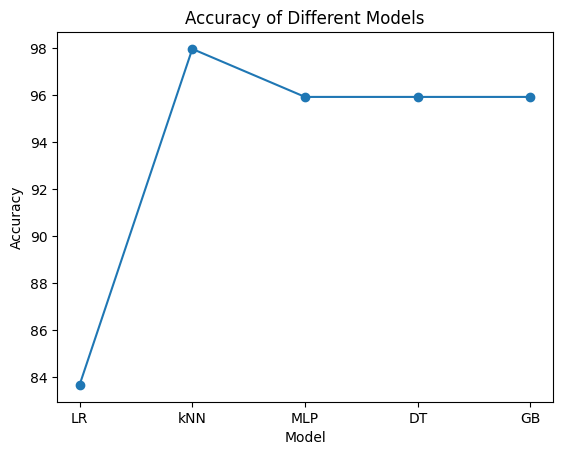

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


acc = [acc1,acc2,acc3,acc4,acc5]
mod = ['LR','kNN','MLP','DT','GB']


plt.plot(mod, acc, marker='o')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

plt.show()